In [1]:
#including all libraries of deep learning

import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM, Conv1D, Flatten, GRU
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.optimizers import Adam


Using TensorFlow backend.


In [2]:

# convert an array of values into a dataset matrix

def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)


In [3]:
# fix random seed for reproducibility

numpy.random.seed(7)

# load the dataset

dataframe = read_csv(r'nifty50.csv')
dataset = dataframe['open'].tolist() 
dataset = numpy.array(dataset)
dataset = numpy.reshape(dataset , [ len(dataset) ,1] )
dataset
train_size = int(len(dataset) * 0.010)
dataset=dataset[0:train_size,:]
dataset.shape

(3529, 1)

In [4]:
# normalize the dataset

scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

# split into train and test sets

train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
train.shape


(2364, 1)

In [5]:
# reshape into X=t and Y=t+1

look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

print(trainX.shape)
#trainY.shape

(2360, 3)


In [6]:
# reshape input to be [samples, time steps, features]


trainX = numpy.reshape(trainX, (trainX.shape[0],1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

print(trainX.shape)

print(testX.shape)

(2360, 1, 3)
(1161, 1, 3)


In [7]:
# create and fit the LSTM network

model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back )))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer = 'adam')


In [8]:
model.fit(trainX, trainY, nb_epoch = 1  , batch_size = 1)


C:\Users\Ankit Siddhartha\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/1
2360/2360 [==============================] - 10s 4ms/step - loss: 0.0287


In [9]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [10]:
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
#trainY = scaler.inverse_transform([trainY])
#trainY = scaler.inverse_transform(trainY)
testPredict = scaler.inverse_transform(testPredict)
#testY = scaler.inverse_transform([testY])
#testY = scaler.inverse_transform(testY)
print(trainY.shape)
print(testPredict.shape)
print(testY.shape)



(2360,)
(1161, 1)
(1161,)


In [11]:
# calculate root mean squared error

#trainScore = math.sqrt(mean_squared_error(trainY , trainPredict[:,0]))
#print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY , testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))


Test Score: 5551.03 RMSE


In [12]:
# shift train predictions for plotting

trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict



In [13]:
# shift test predictions for plotting

testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict


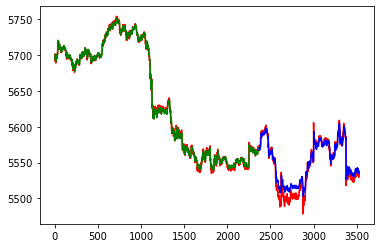

In [14]:
# plot baseline and predictions

plt.plot(scaler.inverse_transform(dataset), color = "r")
plt.plot(trainPredictPlot, color = "g")
plt.plot(testPredictPlot, color = "b" )
plt.show()


In [15]:
dataset = dataframe['Open'].tolist() 
dataset = numpy.array(dataset)
print len(dataset)
dataset = numpy.reshape(dataset , [ len(dataset) ,1] )
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)


SyntaxError: invalid syntax (<ipython-input-15-88cde5091078>, line 3)

In [ ]:
# split into train and test sets

train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]



In [ ]:
# reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)



In [ ]:
# reshape input to be [samples, time steps, features]

trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))


In [ ]:
# create and fit the LSTM network

model = Sequential()
model.add(GRU(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, nb_epoch = 2  , batch_size=1)
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)



In [ ]:
# invert predictions

trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform(trainY)
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform(testY)
# calculate root mean squared error

trainScore = math.sqrt(mean_squared_error(trainY , trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY , testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))


In [ ]:
# shift train predictions for plotting

trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict


In [ ]:
# shift test predictions for plotting

testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict


In [ ]:
# plot baseline and predictions

plt.plot(scaler.inverse_transform(dataset), color = "r")
plt.plot(trainPredictPlot, color = "g")
plt.plot(testPredictPlot, color = "b" )
plt.show()


In [ ]:
dataset = dataframe['Open'].tolist() 
dataset = numpy.array(dataset)
print len(dataset)
dataset = numpy.reshape(dataset , [ len(dataset) ,1] )
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)



In [ ]:

# split into train and test sets

train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]


In [ ]:
# reshape into X=t and Y=t+1

look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# reshape input to be [samples, time steps, features]

trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

# create and fit the LSTM network

train_ =  [ ]
for xx in trainX: 
    train_.append(xx[0])
test_ =  [ ]
for xx in testX: 
    test_.append(xx[0])
test_ = numpy.array(test_)
train_ = numpy.array(train_)
model.reset_states( )
model = Sequential()
model.add(Dense(32, input_dim = 3 ,  activation='tanh'))
#model.add(    BatchNormalization())
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1 ))
model.compile(loss='mean_squared_error', optimizer=Adam() )
print(model.summary())
model.fit (train_ , trainY , nb_epoch = 50 , verbose=1)
# make predictions

trainPredict = model.predict(train_)
testPredict = model.predict(test_)
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform(trainY)
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform(testY)

# invert predictions
# calculate root mean squared errorT

trainScore = math.sqrt(mean_squared_error(trainY , trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY , testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

# shift train predictions for plotting

trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# shift test predictions for plotting

testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

# plot baseline and predictions

plt.plot(scaler.inverse_transform(dataset) ,  color='r'   )
plt.plot(trainPredictPlot,  color='g' )
plt.plot(testPredictPlot, color='b' )
plt.show()
